In [31]:
import numpy as np
import os

def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return np.array([float(line.strip()) for line in lines])

def maximum_spacing_estimator(data):
    # Step 1: Sort the data
    sorted_data = np.sort(data)
    
    # Step 2: Calculate differences between consecutive order statistics
    differences = np.diff(sorted_data)
    #print(differences)
    
    # Step 3: Find the maximum spacing
    max_spacing = np.max(differences)
    print(max_spacing)
    
    # Step 4: Compute Maximum Spacing Estimator
    n = len(data)
    theta_mse = (n + 1) / n * max_spacing
    
    return theta_mse

# Generate three sets of sample data
np.random.seed(42)  # for reproducibility

# Getting the home directory
home_dir = os.path.expanduser("~")

# Constructing file paths
file_path_1 = os.path.join(home_dir, 'Downloads', 'sampleset_1_problemsheet4_ex1.txt')
file_path_2 = os.path.join(home_dir, 'Downloads', 'sampleset_2_problemsheet4_ex1.txt')
file_path_3 = os.path.join(home_dir, 'Downloads', 'sampleset_3_problemsheet4_ex1.txt')

# Read data from the three files
sample_data_1 = read_data(file_path_1)
sample_data_2 = read_data(file_path_2)
sample_data_3 = read_data(file_path_3)

# Calculate Maximum Spacing Estimators for each set of samples
theta_mse_1 = maximum_spacing_estimator(sample_data_1)
theta_mse_2 = maximum_spacing_estimator(sample_data_2)
theta_mse_3 = maximum_spacing_estimator(sample_data_3)

# Display the results
print(f"Set 1: Maximum Spacing Estimator for θ = {theta_mse_1:.4f}")
print(f"Set 2: Maximum Spacing Estimator for θ = {theta_mse_2:.4f}")
print(f"Set 3: Maximum Spacing Estimator for θ = {theta_mse_3:.4f}")


0.45489999999999986
0.2287999999999999
0.7923
Set 1: Maximum Spacing Estimator for θ = 0.4701
Set 2: Maximum Spacing Estimator for θ = 0.2334
Set 3: Maximum Spacing Estimator for θ = 0.8913


MSE for Kalman Filter: 0.14488890520546838


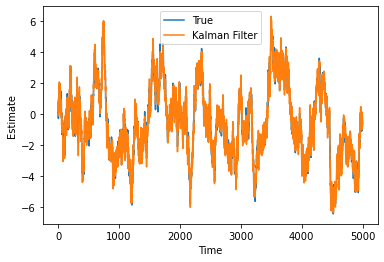

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# Define parameters
sigma_x = 0.5  # Process noise standard deviation
sigma_y = 0.5  # Measurement noise standard deviation


# Getting the home directory
home_dir = os.path.expanduser("~")

# Constructing file paths
file_path_1 = os.path.join(home_dir, 'Downloads', 'data.txt')
file_path_2 = os.path.join(home_dir, 'Downloads', 'reference_signal.txt')

y_obs = read_data(file_path_1)
z_true = read_data(file_path_2)

    
# Kalman filter implementation
def kalman_filter(y, sigma_x, sigma_y):
    T = len(y)
    z_pred = np.zeros(T)
    P_pred = np.zeros(T)
    K_gain = np.zeros(T)

    # Initial conditions
    z_pred[0] = np.random.normal(0, 0.5)
    P_pred[0] = sigma_x ** 2

    for t in range(1, T):
        # Prediction step
        z_pred[t] = 0.99 * z_pred[t-1]
        P_pred[t] = 0.99 ** 2 * P_pred[t-1] + sigma_x ** 2

        # Update step
        K_gain[t] = P_pred[t] / (P_pred[t] + sigma_y ** 2)
        z_pred[t] = z_pred[t] + K_gain[t] * (y[t] - z_pred[t])
        P_pred[t] = (1 - K_gain[t]) * P_pred[t]

    return z_pred

def calculate_mse(true_signal, estimated_signal):
    return np.mean((true_signal - estimated_signal)**2)

# Run Kalman filter
z_kalman = kalman_filter(y_obs, sigma_x, sigma_y)
mse_kalman = calculate_mse(z_true[:5000], z_kalman)

# Print results
print("MSE for Kalman Filter:", mse_kalman)

# Plot
plt.figure()
plt.plot(z_true, label='True')
plt.plot(z_kalman, label='Kalman Filter')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Estimate')

plt.show()